In [1]:
# KNN Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("glass.csv")
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
df.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.744993  
Al    0.479404 -0.074402  0.598829  
Si   -0.102151 -0.094201  0.151565  
K    -0.042618 -0.007719 -0.010054  
Ca   -0.112841  0.124968  0.000952  
Ba    1.000000 -0.058692  0.575161  
Fe   -0.058692  1.000000 -0.188278  
Type  0.575161 -0.188278  1.000000

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df1= df.drop(['K','Ca'],axis=1)
df1

RI     Na    Mg    Al     Si    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  1.67  0.0     7

[214 rows x 8 columns]

Grid Search for Algorithm Tuning to find best n_neighbours

In [7]:
from sklearn.model_selection import GridSearchCV
x= df1.iloc[:,0:7]
y= df1.iloc[:,7]

<AxesSubplot:>

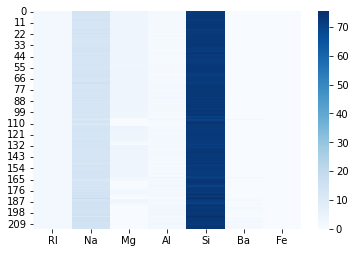

In [8]:
sns.heatmap(x,cmap="Blues")

<AxesSubplot:>

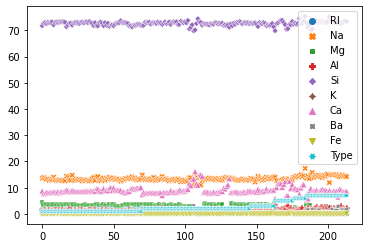

In [9]:
sns.scatterplot(data=df)

/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI', ylabel='Na'>

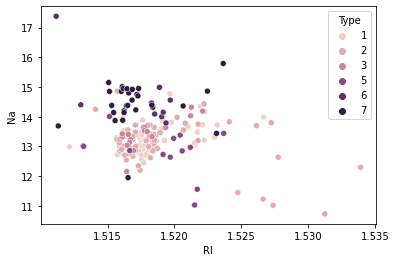

In [15]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

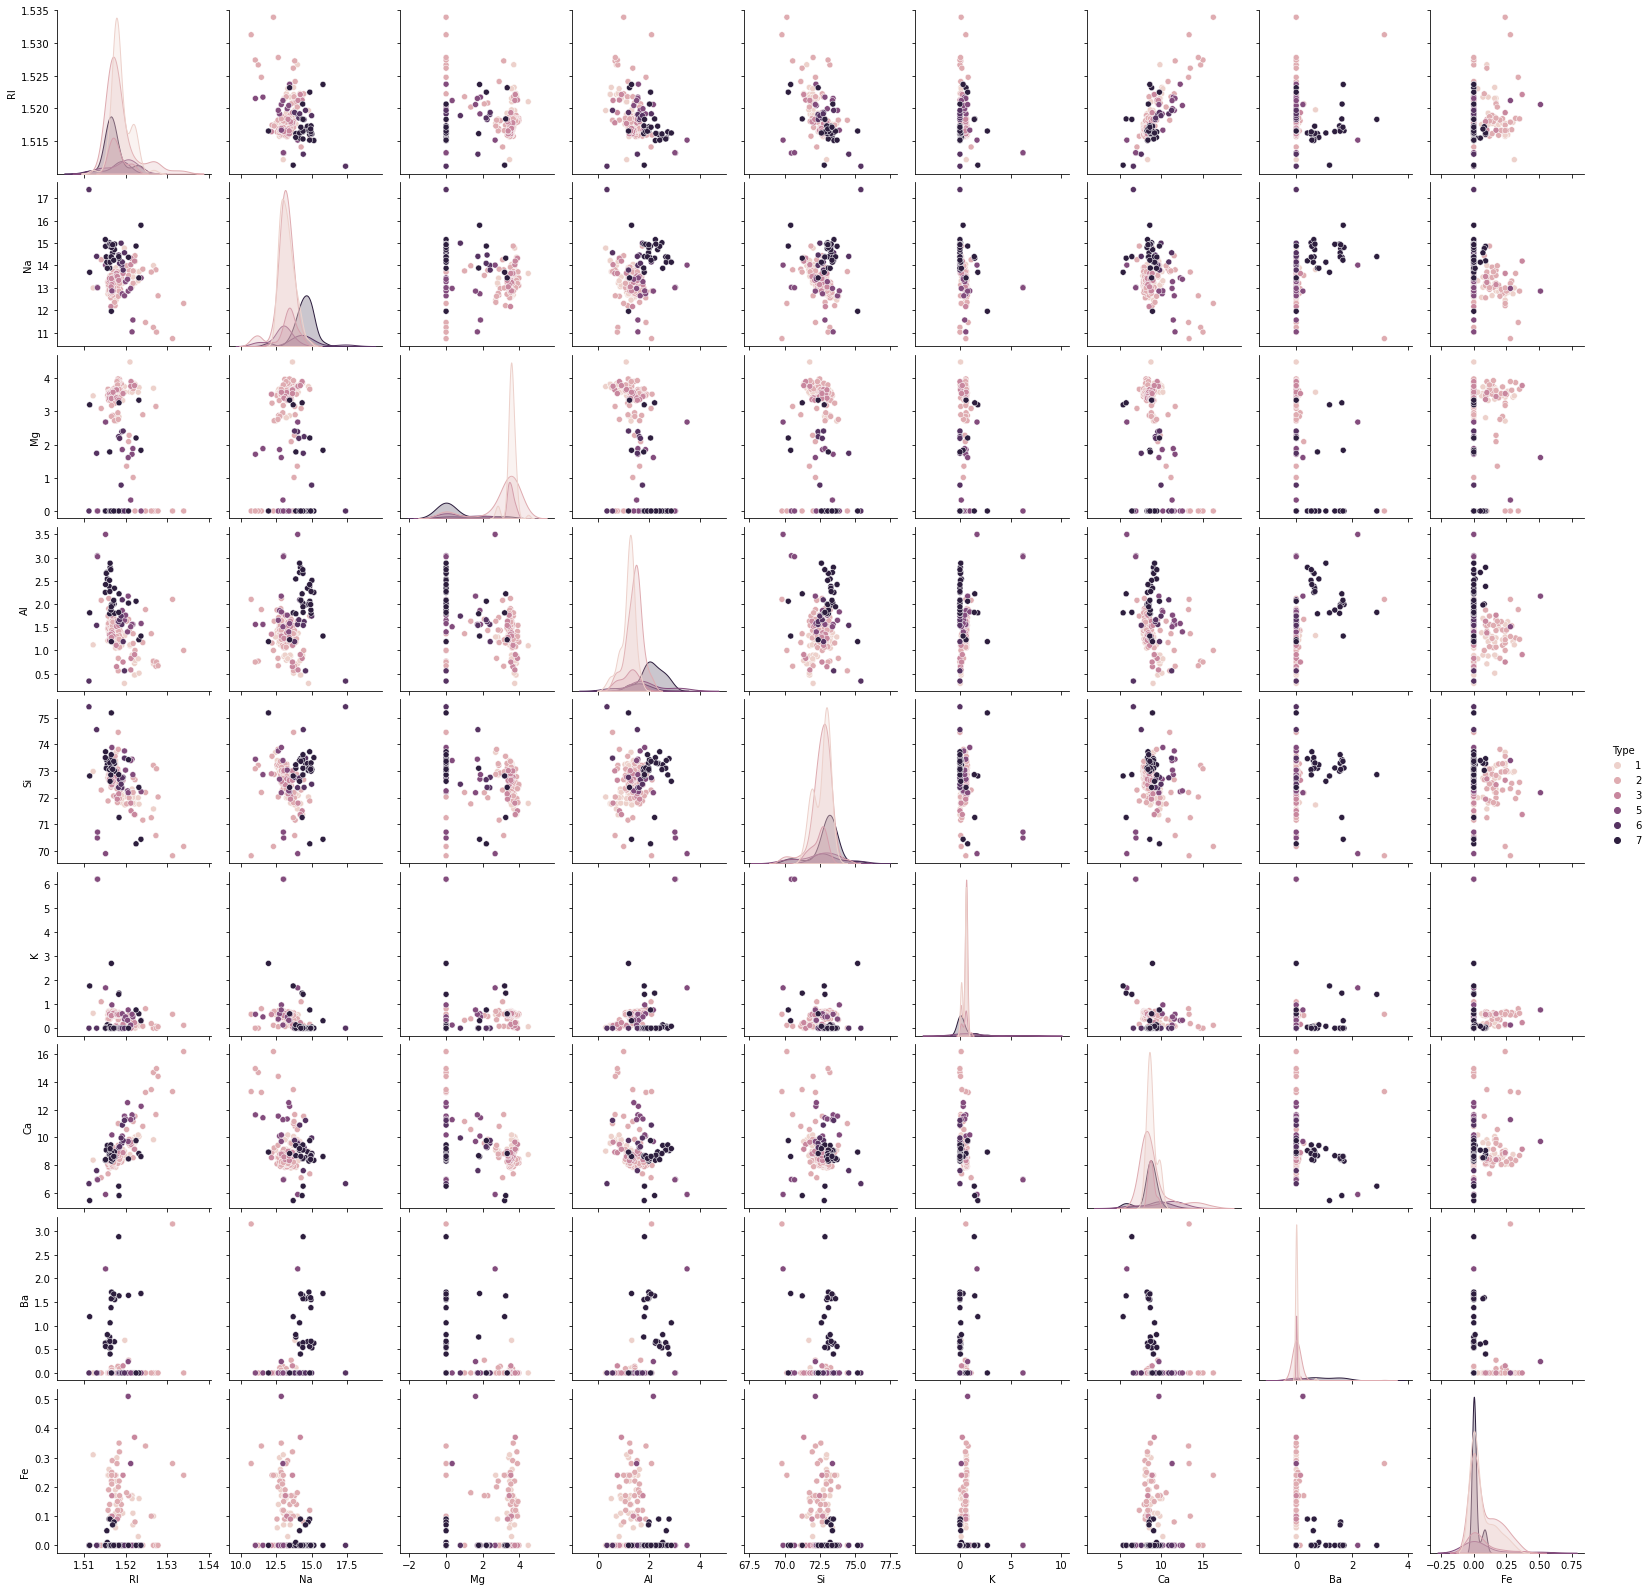

In [16]:
sns.pairplot(df,hue='Type')
plt.show()

In [10]:
print(x)
print(y)

          RI     Na    Mg    Al     Si    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.00  0.0
..       ...    ...   ...   ...    ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  1.67  0.0

[214 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [11]:
n_neighbor= np.array(range(0,51))
param= dict(n_neighbors=n_neighbor)
model= KNeighborsClassifier()
grid= GridSearchCV(estimator= model,param_grid= param)
grid.fit(x,y)

/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 603, in _fit

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.6218161683277963
{'n_neighbors': 1}


In [13]:
classifier= KNeighborsClassifier(n_neighbors=1)
result=cross_val_score(classifier,x,y)

In [14]:
print(result.mean())

0.6218161683277963
